In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
# 读取数据
file_path = "spot-parameter_lens.xlsx"
data = pd.read_excel(file_path)
z_positions = data['位置(mm)']  # 光束传播轴上的位置
a_axis = data['a轴长(mm)']     # a 轴长（代表束宽）

# 计算束宽，取 a 轴长和 b 轴长的平均值
w_z = (data['a轴长(mm)'] + data['b轴长(mm)']) / 2

# 定义双曲线拟合方程
def hyperbolic_fit(z, A, B, C):
    return A + B * z + C * z**2

# 拟合数据
params, _ = curve_fit(hyperbolic_fit, z_positions, w_z**2)
A, B, C = params

# 计算光束参数
z_0 = -B / (2 * C)                     # 光腰位置
omega_0 = np.sqrt(A - B**2 / (4 * C))   # 光腰半径
theta = np.sqrt(C)                      # 远场发散角
Z_0 = (1 / (2 * C)) * np.sqrt(4 * A * C - B**2)  # 瑞利长度

# 输出计算结果
print(f"Beam Waist Position (z0): {z_0:.2f} mm")
print(f"Beam Waist Radius (ω0): {omega_0:.4f} mm")
print(f"Divergence Angle (θ): {theta:.6f} rad")
print(f"Rayleigh Length (Z0): {Z_0:.2f} mm")

Beam Waist Position (z0): 283.71 mm
Beam Waist Radius (ω0): 0.4617 mm
Divergence Angle (θ): 0.002456 rad
Rayleigh Length (Z0): 187.96 mm


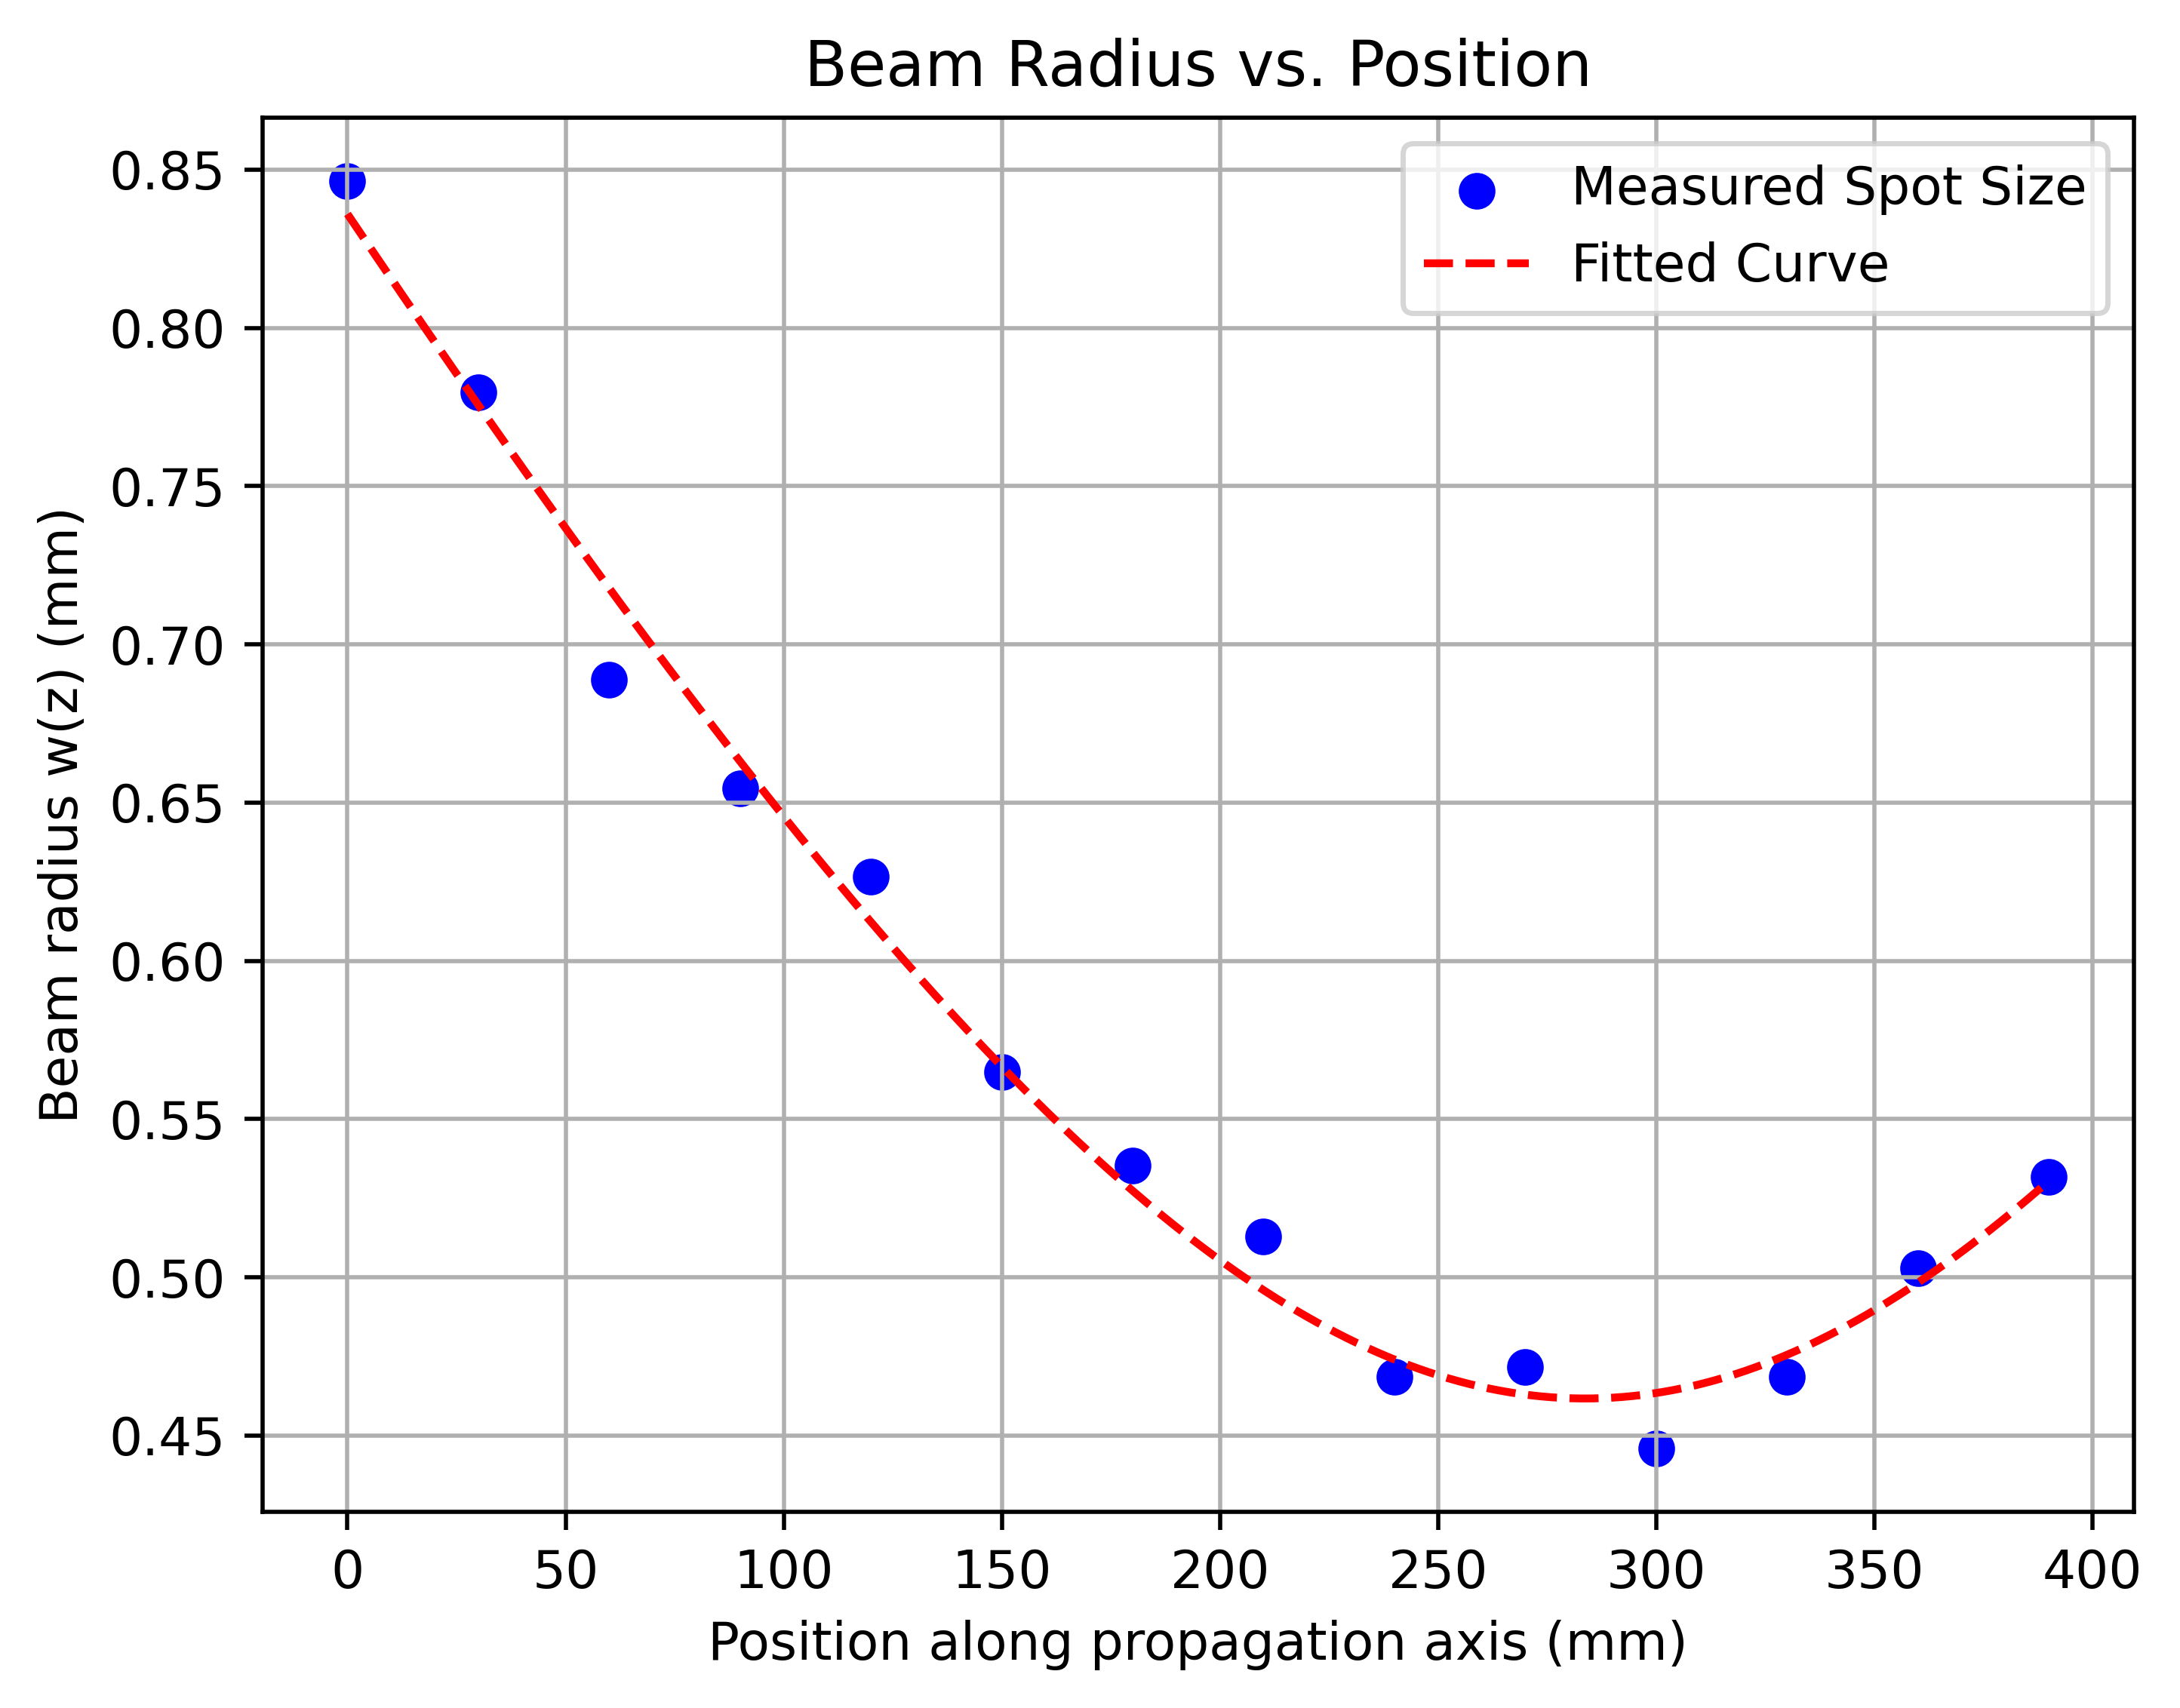

In [4]:
# 绘图
z_range = np.linspace(min(z_positions), max(z_positions), 500)
w_fitted = np.sqrt(hyperbolic_fit(z_range, A, B, C))

plt.figure(dpi=500)
plt.scatter(z_positions, w_z, color="blue", label="Measured Spot Size")
plt.plot(z_range, w_fitted, color="red", linestyle="--", label="Fitted Curve")
plt.xlabel("Position along propagation axis (mm)")
plt.ylabel("Beam radius w(z) (mm)")
plt.title("Beam Radius vs. Position")
plt.legend()
plt.grid()
plt.show()

In [44]:
# 实验四，加透镜

file_path = "spot_parameter4T.xlsx"
data = pd.read_excel(file_path)
z_positions = data['位置(mm)']
a_axis = data['a轴长(mm)']

# 计算束宽，取 a 轴长和 b 轴长的平均值
w_z = (data['a轴长(mm)'] + data['b轴长(mm)']) / 2

# 定义双曲线拟合方程
def hyperbolic_fit(z, A, B, C):
    return A + B * z + C * z**2

# 拟合数据
params, _ = curve_fit(hyperbolic_fit, z_positions, w_z**2)
A, B, C = params

# 计算光束参数
z_0 = -B / (2 * C)                     # 光腰位置
omega_0 = np.sqrt(A - B**2 / (4 * C))   # 光腰半径
theta = np.sqrt(C)                      # 远场发散角
Z_0 = (1 / (2 * C)) * np.sqrt(4 * A * C - B**2)  # 瑞利长度

# 输出计算结果
print(f"Beam Waist Position (z0): {z_0:.2f} mm")
print(f"Beam Waist Radius (ω0): {omega_0:.4f} mm")
print(f"Divergence Angle (θ): {theta:.6f} rad")
print(f"Rayleigh Length (Z0): {Z_0:.2f} mm")

z0_out = z_0
zR_out = Z_0

Beam Waist Position (z0): 277.78 mm
Beam Waist Radius (ω0): 0.4458 mm
Divergence Angle (θ): 0.002268 rad
Rayleigh Length (Z0): 196.57 mm


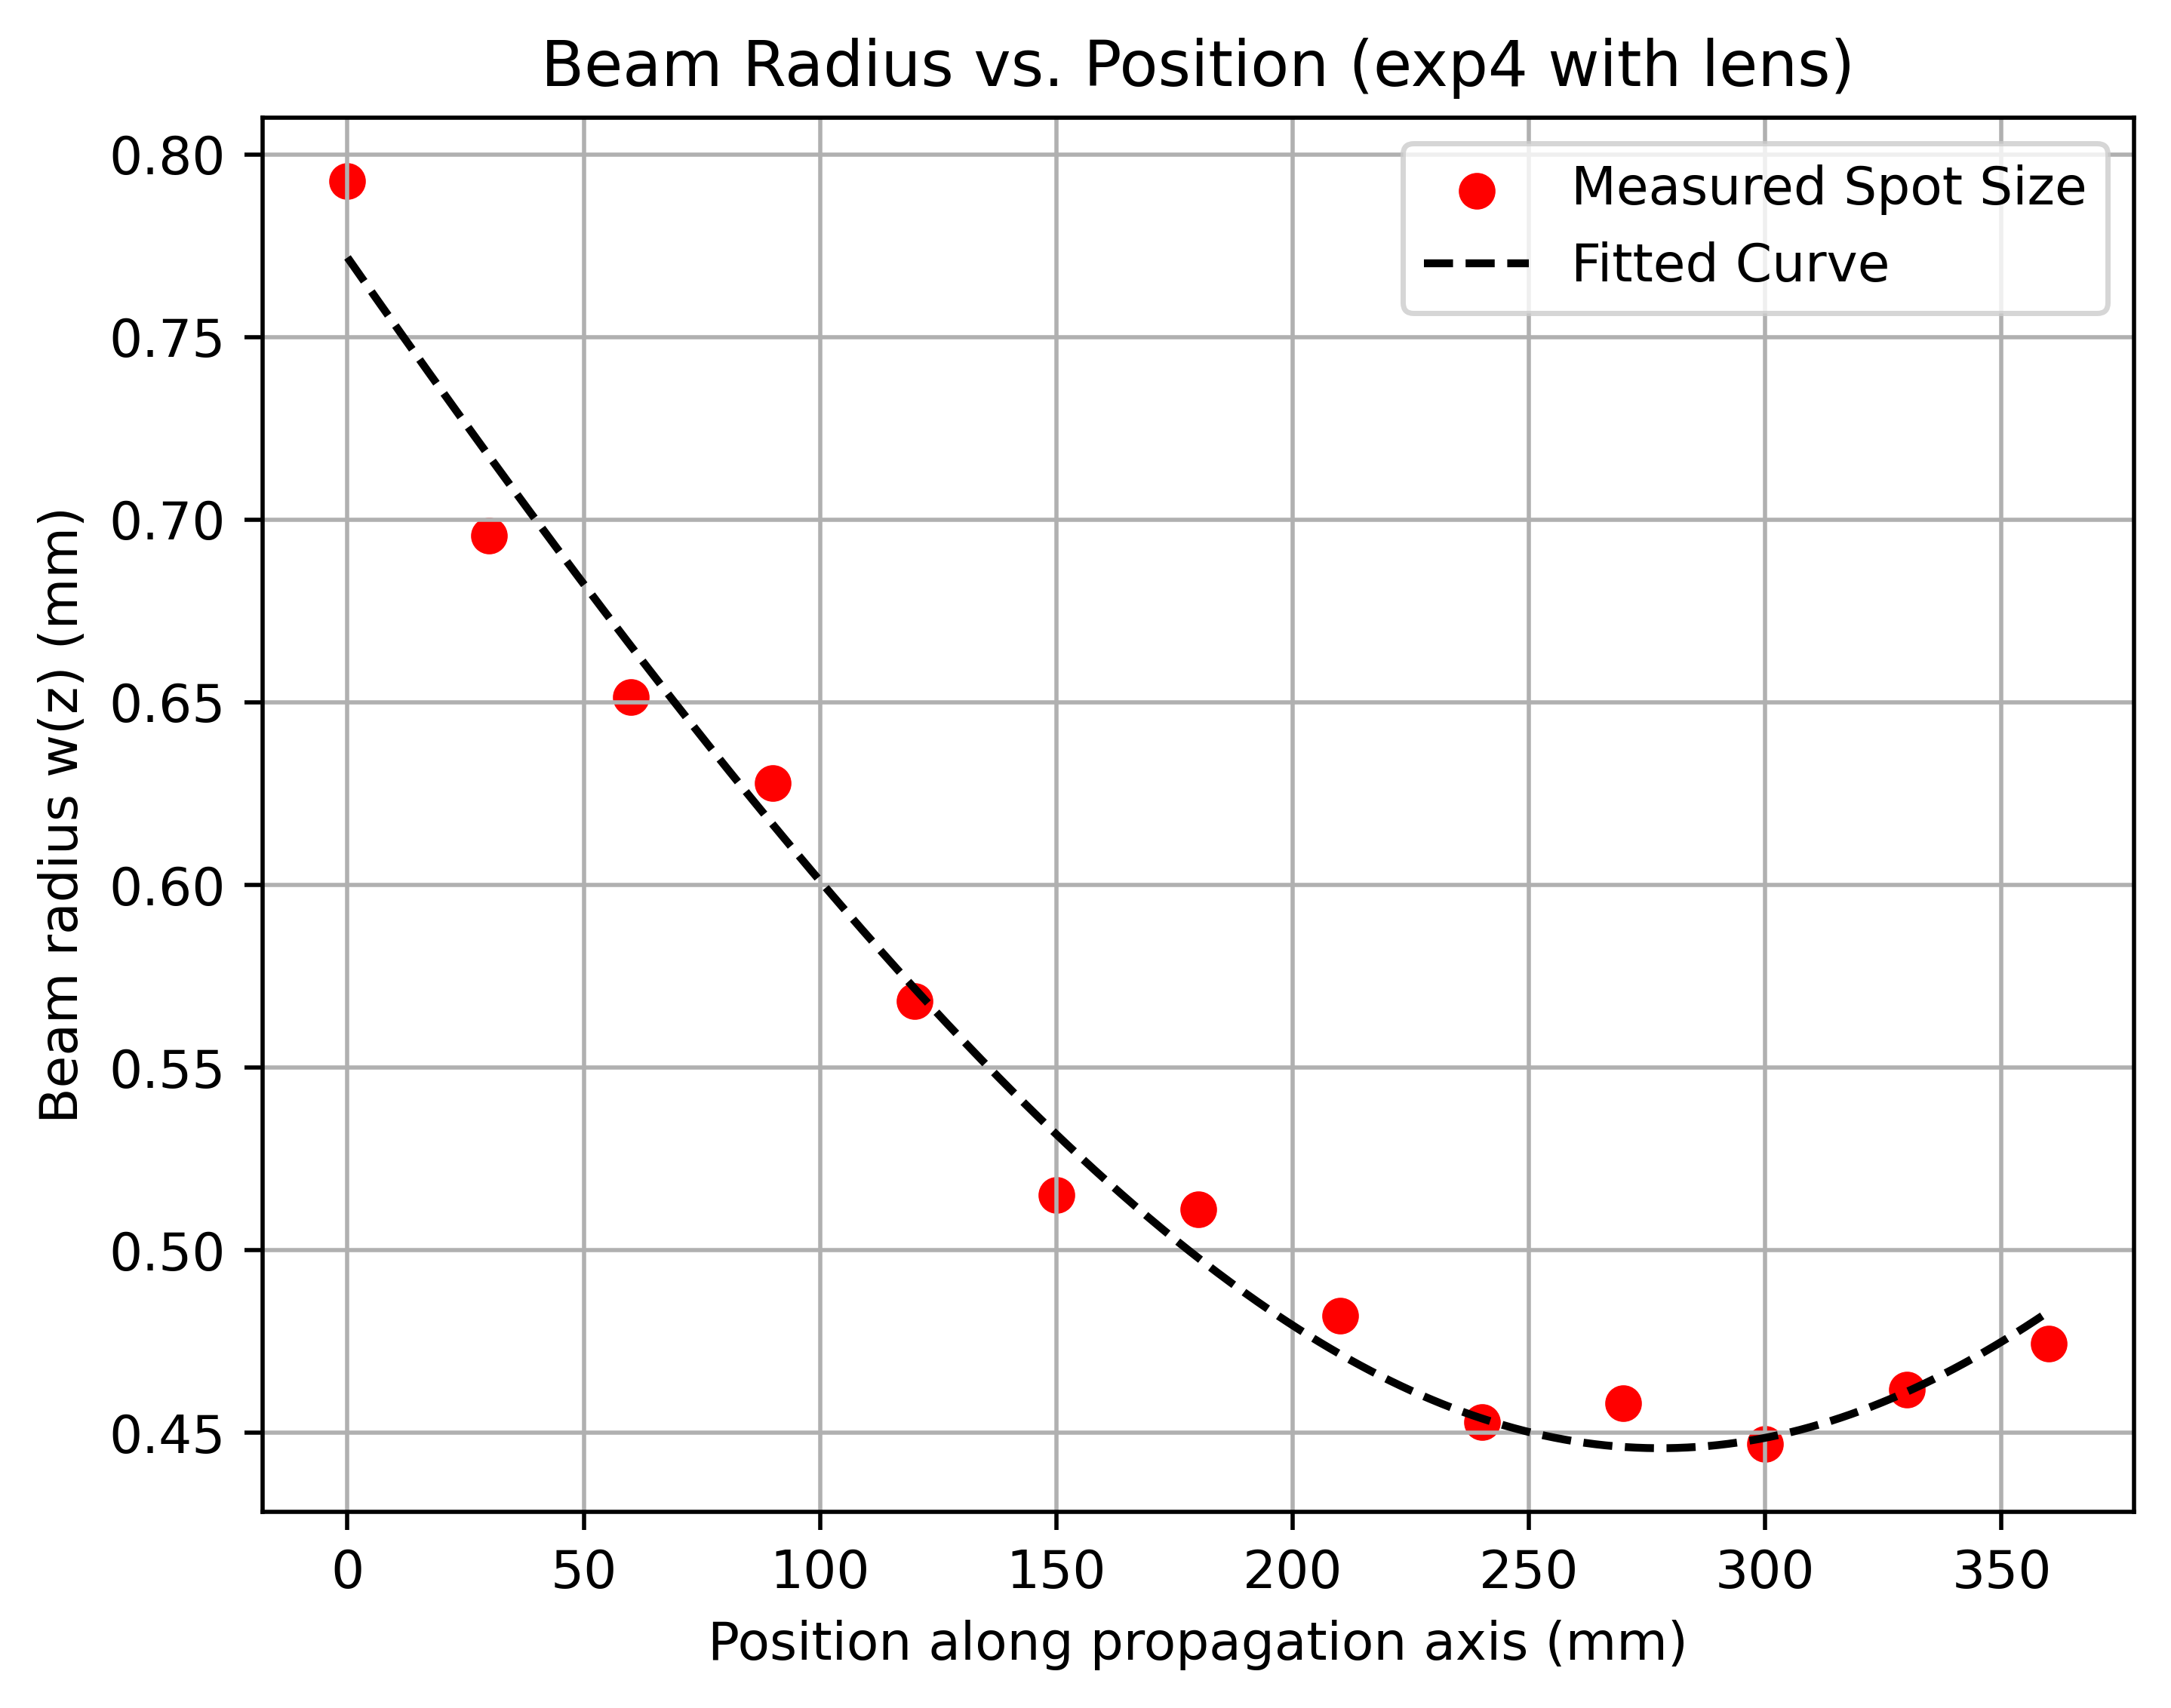

In [45]:
# 绘图
z_range = np.linspace(min(z_positions), max(z_positions), 500)
w_fitted = np.sqrt(hyperbolic_fit(z_range, A, B, C))

plt.figure(dpi=500)
plt.scatter(z_positions, w_z, color="red", label="Measured Spot Size")
plt.plot(z_range, w_fitted, color="black", linestyle="--", label="Fitted Curve")
plt.xlabel("Position along propagation axis (mm)")
plt.ylabel("Beam radius w(z) (mm)")
plt.title("Beam Radius vs. Position (exp4 with lens)")
plt.legend()
plt.grid()
plt.show()

In [46]:
# 实验四，无透镜

file_path = "spot_parameter4.xlsx"
data = pd.read_excel(file_path)
z_positions = data['位置(mm)']
a_axis = data['a轴长(mm)']

# 计算束宽，取 a 轴长和 b 轴长的平均值
w_z = (data['a轴长(mm)'] + data['b轴长(mm)']) / 2

# 定义双曲线拟合方程
def hyperbolic_fit(z, A, B, C):
    return A + B * z + C * z**2

# 拟合数据
params, _ = curve_fit(hyperbolic_fit, z_positions, w_z**2)
A, B, C = params

# 计算光束参数
z_0 = -B / (2 * C)                     # 光腰位置
omega_0 = np.sqrt(A - B**2 / (4 * C))   # 光腰半径
theta = np.sqrt(C)                      # 远场发散角
Z_0 = (1 / (2 * C)) * np.sqrt(4 * A * C - B**2)  # 瑞利长度

# 输出计算结果
print(f"Beam Waist Position (z0): {z_0:.2f} mm")
print(f"Beam Waist Radius (ω0): {omega_0:.4f} mm")
print(f"Divergence Angle (θ): {theta:.6f} rad")
print(f"Rayleigh Length (Z0): {Z_0:.2f} mm")

z0_in = z_0
zR_in = Z_0

Beam Waist Position (z0): 678.91 mm
Beam Waist Radius (ω0): 0.3035 mm
Divergence Angle (θ): 0.002068 rad
Rayleigh Length (Z0): 146.76 mm


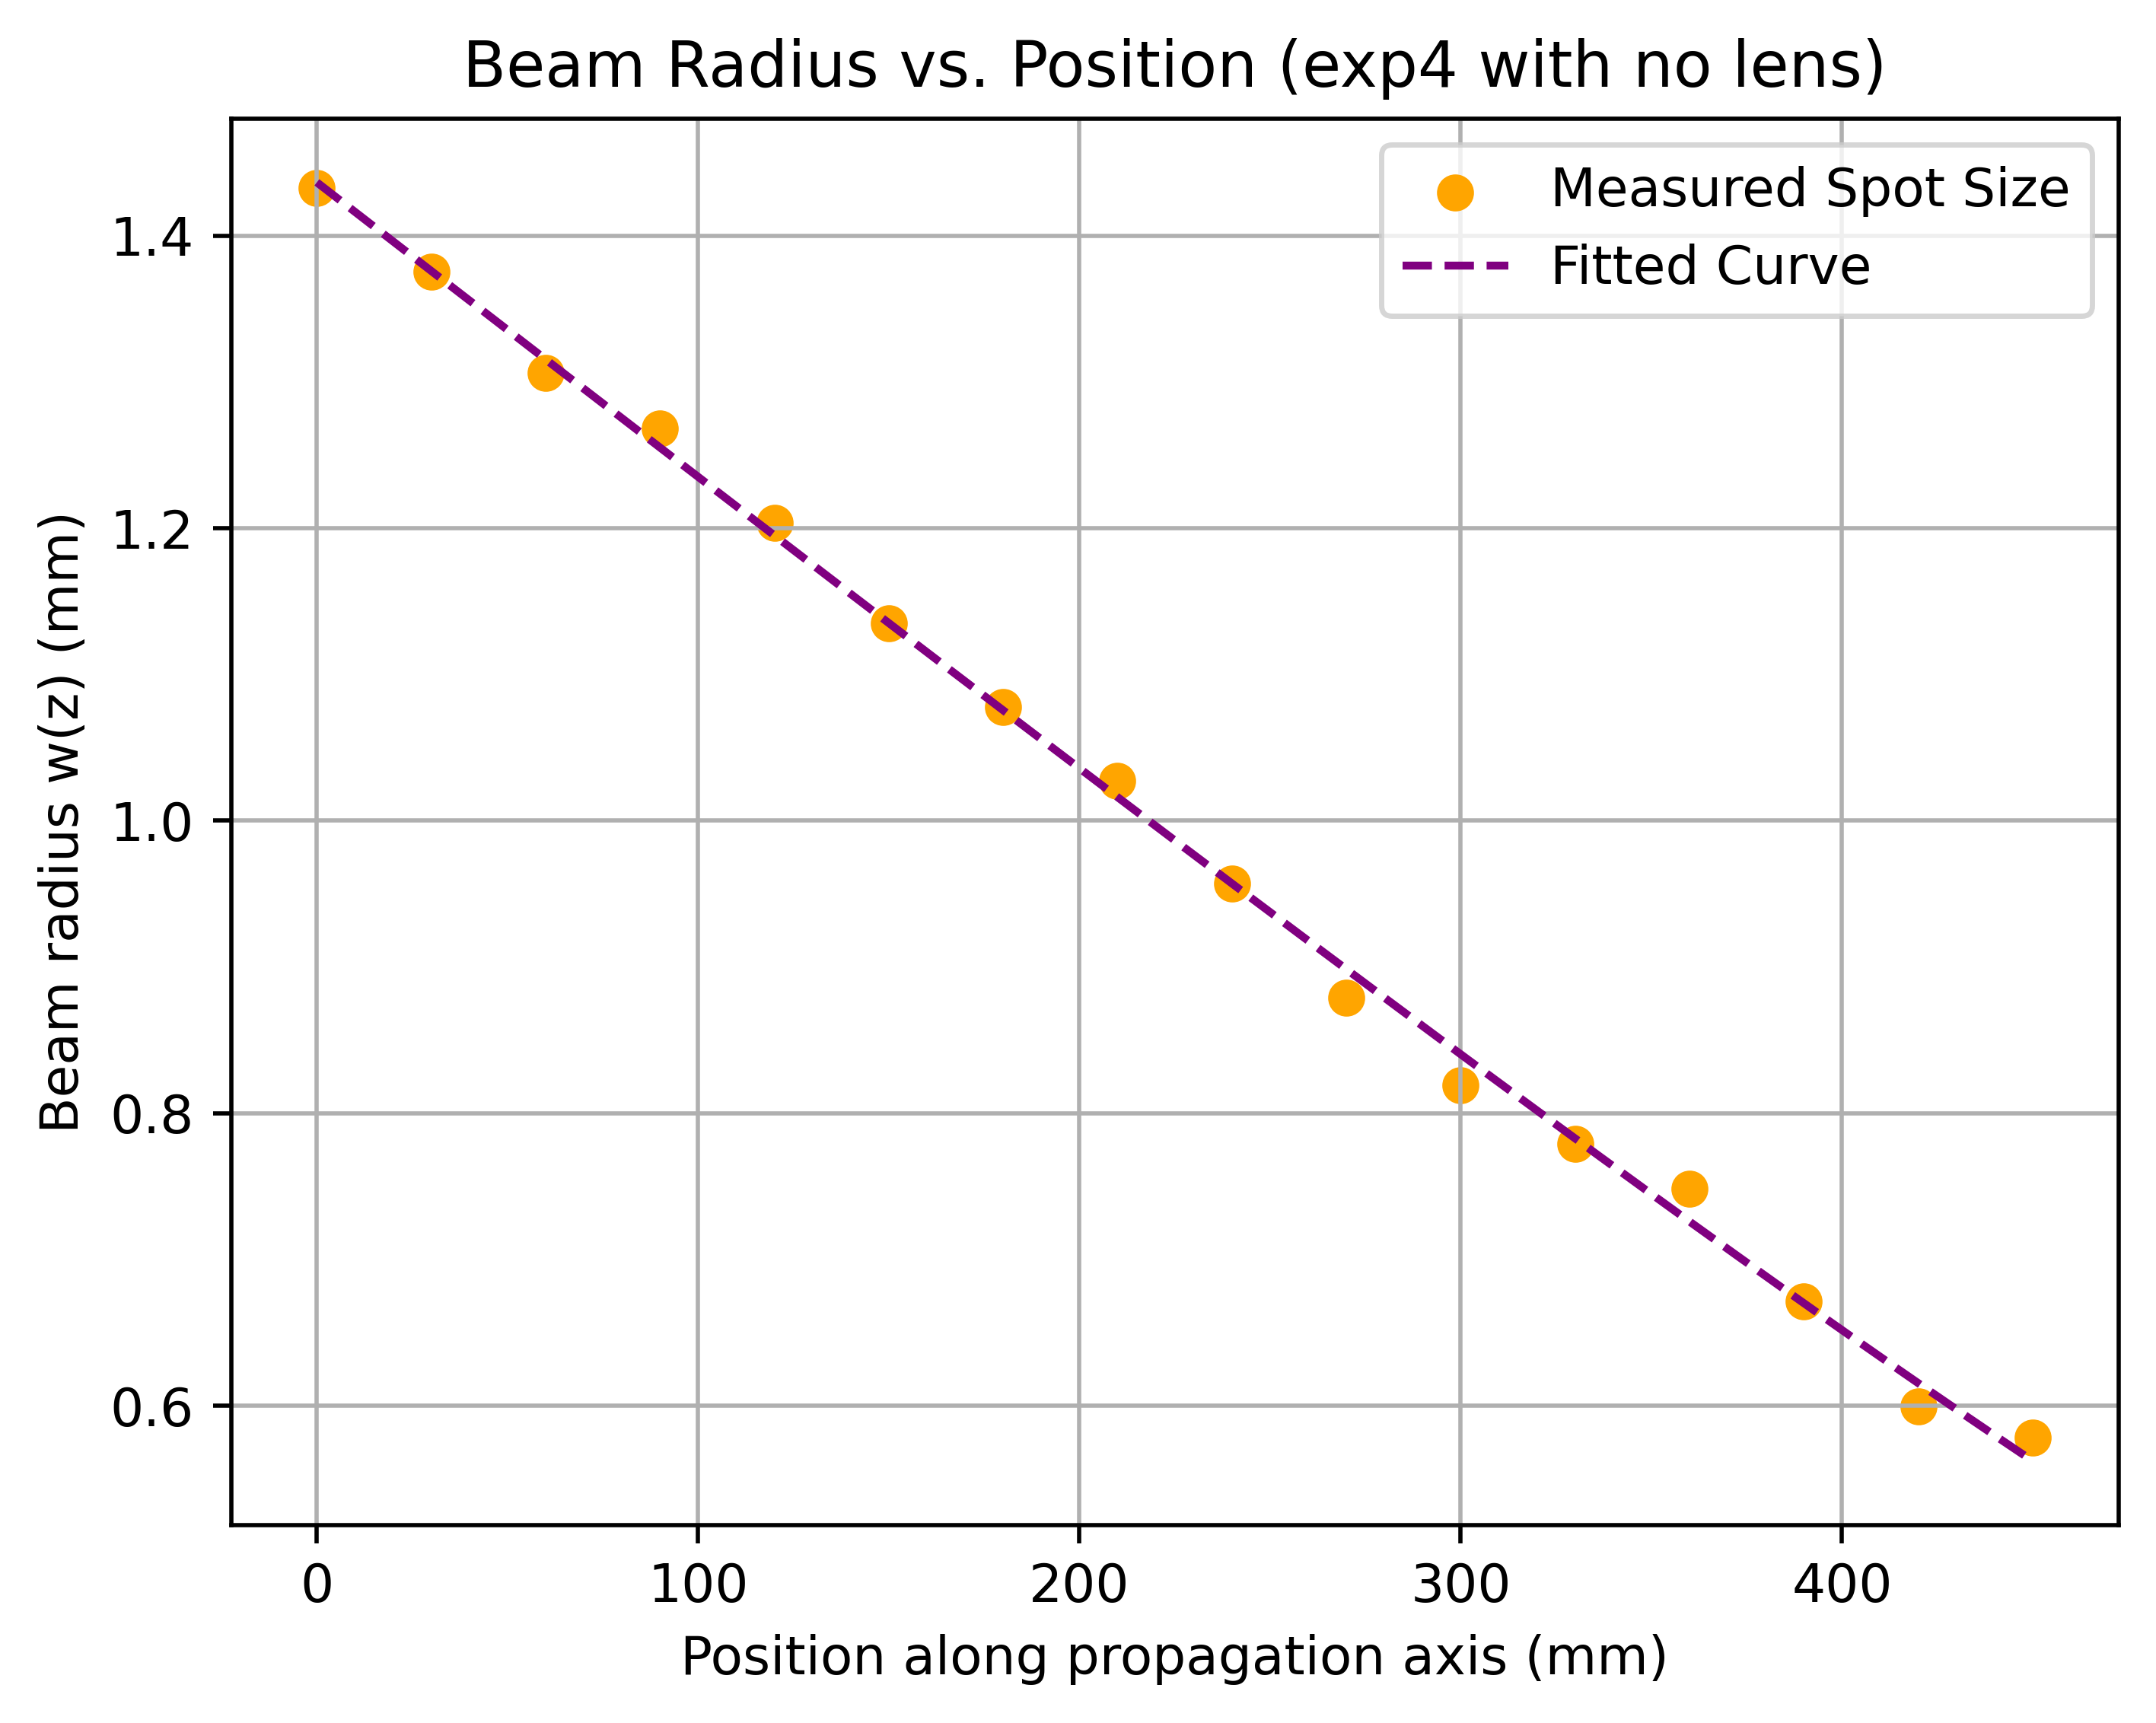

In [47]:
# 绘图
z_range = np.linspace(min(z_positions), max(z_positions), 500)
w_fitted = np.sqrt(hyperbolic_fit(z_range, A, B, C))

plt.figure(dpi=500)
plt.scatter(z_positions, w_z, color="orange", label="Measured Spot Size")
plt.plot(z_range, w_fitted, color="purple", linestyle="--", label="Fitted Curve")
plt.xlabel("Position along propagation axis (mm)")
plt.ylabel("Beam radius w(z) (mm)")
plt.title("Beam Radius vs. Position (exp4 with no lens)")
plt.legend()
plt.grid()
plt.show()

In [48]:
# 定义线性拟合函数
def linear_fit(z, m, c):
    return m * z + c

# 线性拟合
params, covariance = curve_fit(linear_fit, z_positions, w_z)
slope, intercept = params

# 拟合结果和 R² 计算
w_fitted_linear = linear_fit(z_positions, slope, intercept)
residuals = w_z - w_fitted_linear
ss_res = np.sum(residuals**2)
ss_tot = np.sum((w_z - np.mean(w_z))**2)
r_squared = 1 - (ss_res / ss_tot)
mse = np.mean(residuals**2)

# 输出拟合参数和评估结果
print(f"Slope (m): {slope:.6f}")
print(f"Intercept (c): {intercept:.6f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")

Slope (m): -0.001950
Intercept (c): 1.429826
R-squared: 0.9975
Mean Squared Error (MSE): 0.000182


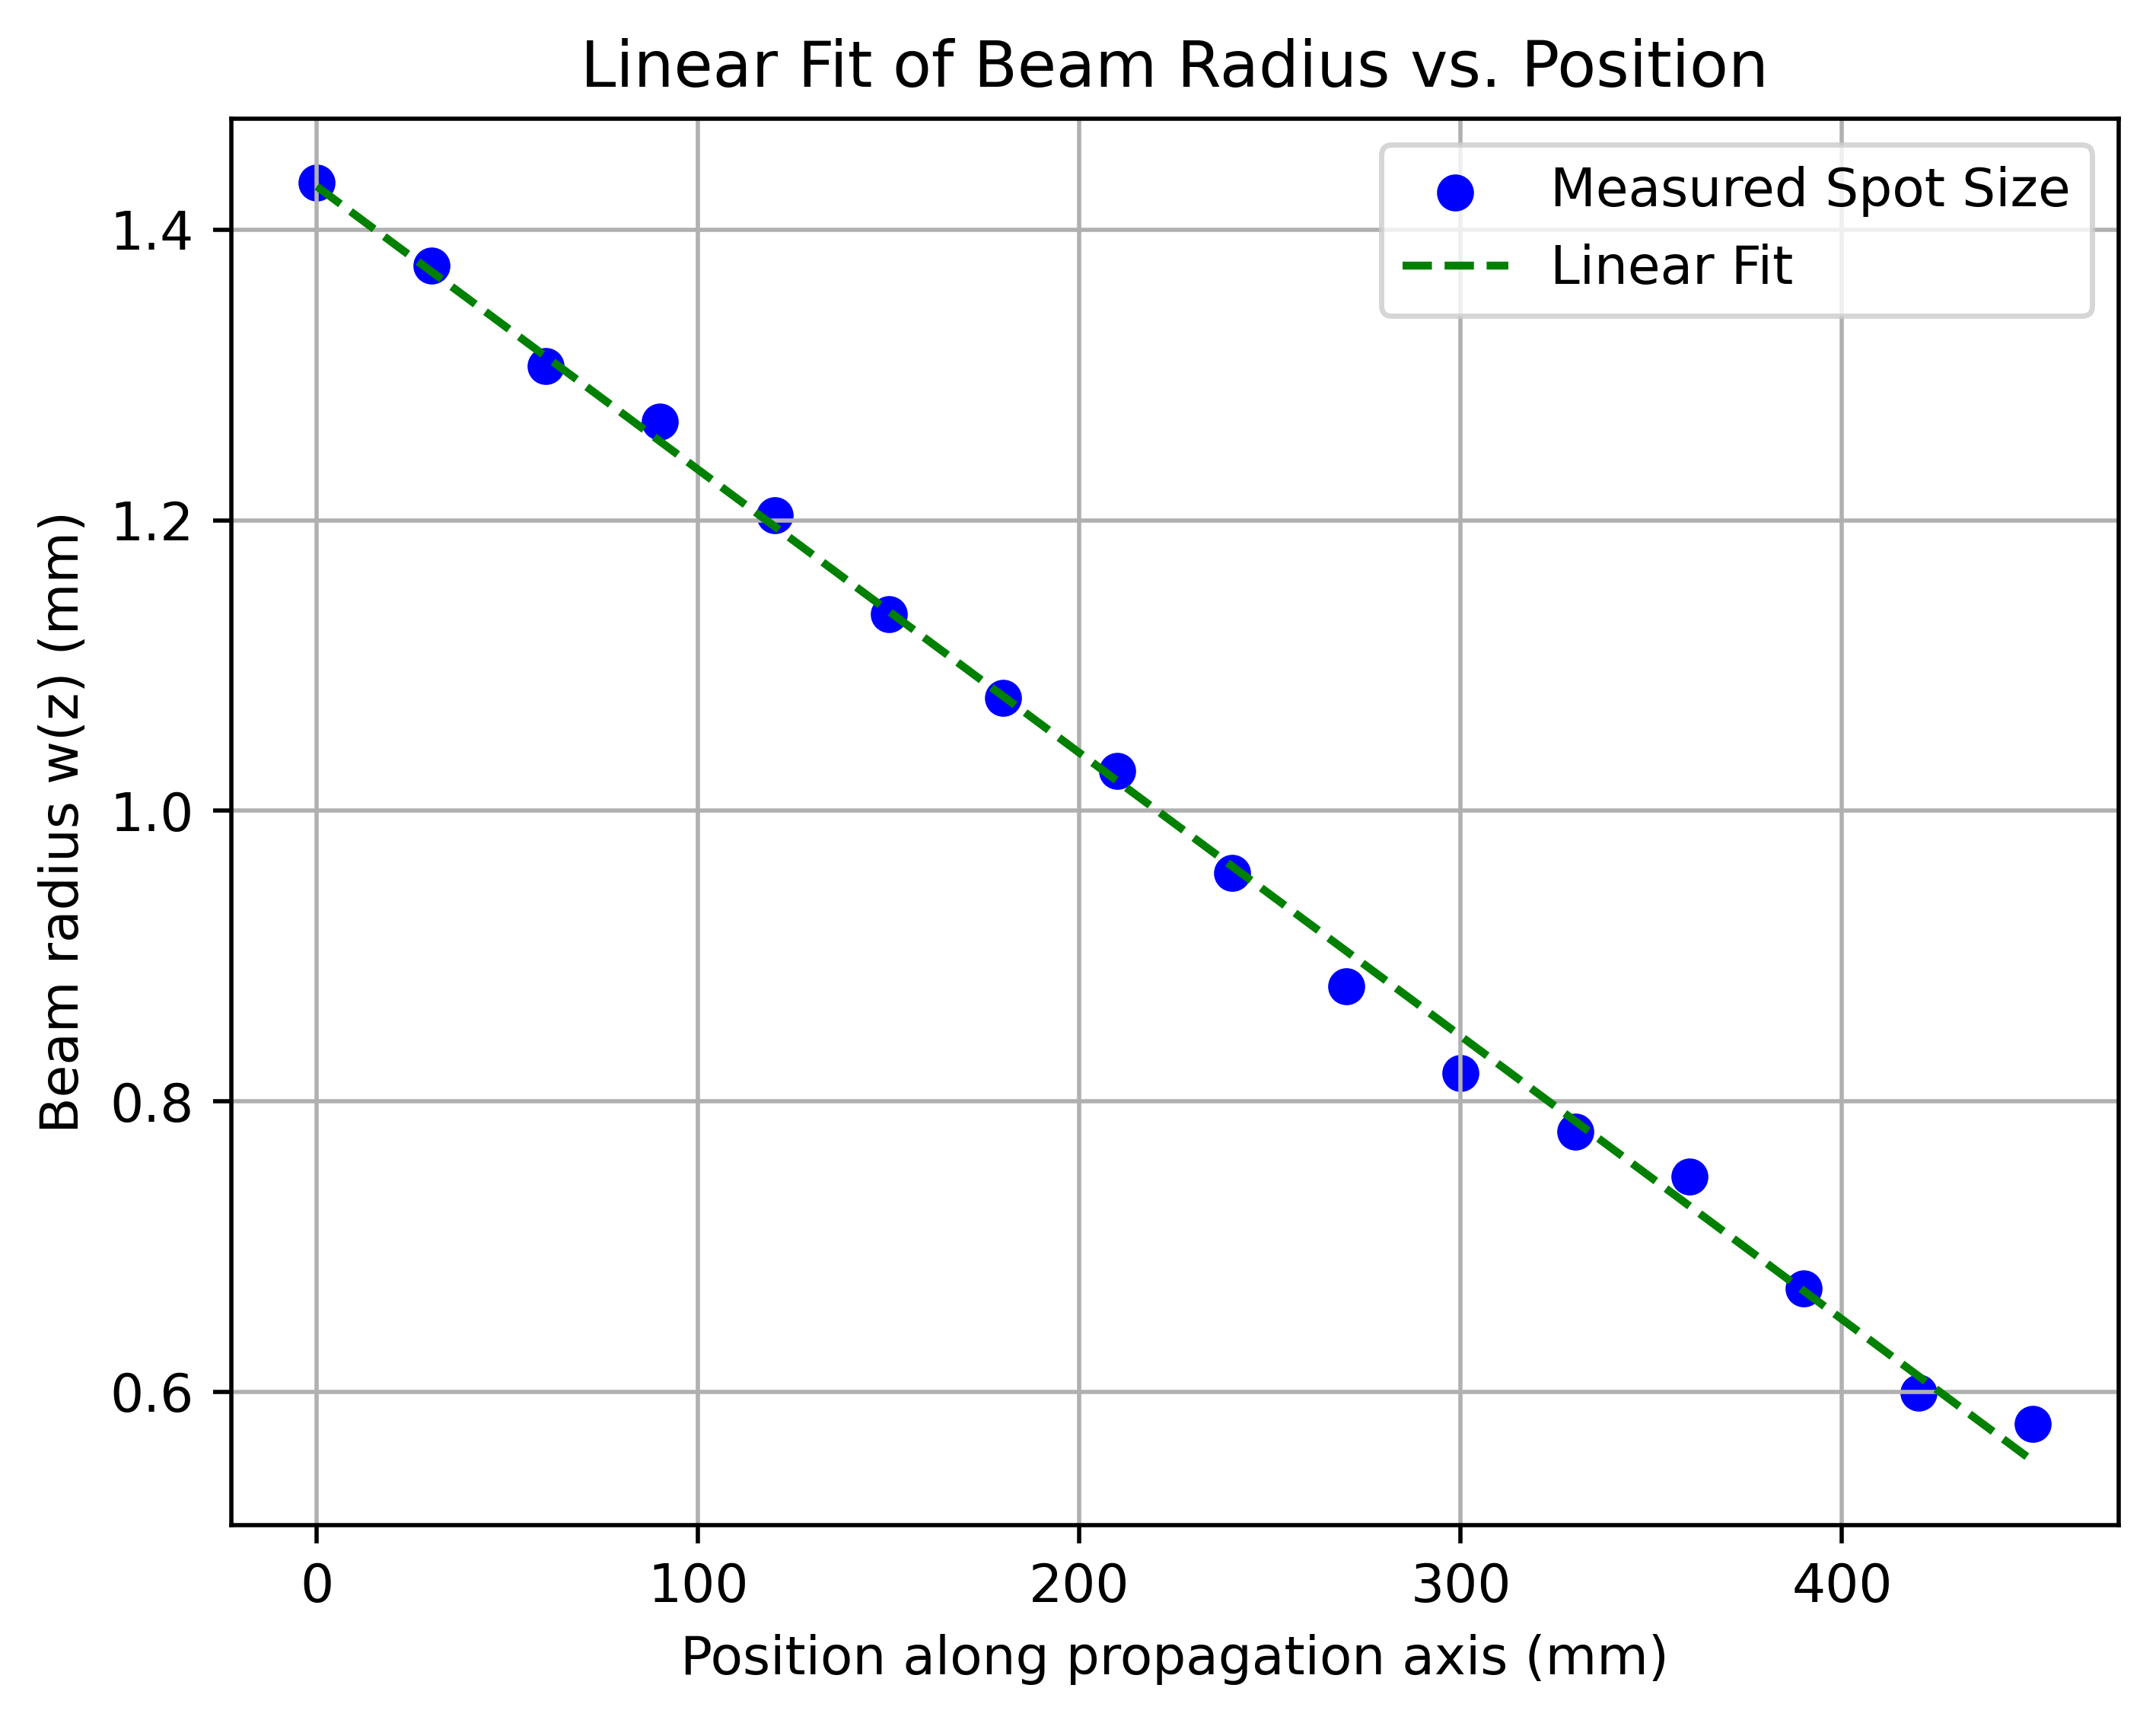

In [49]:
# 绘图
z_range = np.linspace(min(z_positions), max(z_positions), 500)
w_fitted_linear = linear_fit(z_range, slope, intercept)

plt.figure(dpi=500)
plt.scatter(z_positions, w_z, color="blue", label="Measured Spot Size")
plt.plot(z_range, w_fitted_linear, color="green", linestyle="--", label="Linear Fit")
plt.xlabel("Position along propagation axis (mm)")
plt.ylabel("Beam radius w(z) (mm)")
plt.title("Linear Fit of Beam Radius vs. Position")
plt.legend()
plt.grid()
plt.show()

In [66]:
# 采用直线拟合结果估算高斯光束的参数

# λ = 632.8 nm = 0.6328 μm
wavelength = 0.6328  # 微米

# 斜率 m 由拟合结果获得
theta = np.arctan(slope)  # 远场发散角
omega_0 = -0.001 * wavelength / (np.pi * theta)  # 计算束腰半径
z_R = 1000 * np.pi * omega_0**2 / wavelength   # 计算瑞利长度

# 输出结果
print(f"Beam Waist Radius (ω0): {omega_0:.4f} mm")
print(f"Rayleigh Length (zR): {z_R:.4f} mm")

Beam Waist Radius (ω0): 0.1033 mm
Rayleigh Length (zR): 52.9730 mm


In [67]:
# 远场发散角 theta 等于线性拟合的斜率
theta = slope  # 斜率已从拟合中得到
# 计算束腰位置 z_0
z_0_1 = (omega_0 - intercept) / theta

# 输出结果
print(f"Beam Waist Position (z0): {z_0_1:.4f} mm")

# 若仅从渐近线考虑
z_0_2 = -intercept/slope
print(f"Beam Waist Position (z0): {z_0_2:.4f} mm")


Beam Waist Position (z0): 680.2765 mm
Beam Waist Position (z0): 733.2494 mm


In [68]:
# 变量重整
z0_in_2_1 = z_0_1
z0_in_2_2 = z_0_2
zR_in_2 = z_R

In [69]:
# q参数
def q_parameter(z, z0, z_R):
    '''
    如果光束轴沿 z 方向，光束腰部位于 z0，瑞利区间为 z_R，则复光束参数可以等价表示为：
    q = (z - z0) + i * z_R
    '''
    return complex(z - z0, z_R)

def q_parameter_transform(q_in, a=1, b=0, c=-1/200, d=1):
    '''
    元件矩阵：
    (a, b)
    (c, d)
    
    由变换得到的q2为：
    q2 = (a * q1 + b) / (c * q1 + d)
    '''
    return (a * q_in + b) / (c * q_in + d)


In [70]:
# 透镜位置
z_lens = -440

q1 = q_parameter(z_lens, -z0_out, zR_out)
q2 = q_parameter(z_lens, -z0_in, zR_in)
q2_T = q_parameter_transform(q2)
q3 = q_parameter(z_lens, -z0_in_2_1, zR_in_2)
q3_T = q_parameter_transform(q3)
q4 = q_parameter(z_lens, -z0_in_2_2, zR_in_2)
q4_T = q_parameter_transform(q4)

In [71]:
print('加装透镜出射光的q参数为：')
print(f"实部：{q1.real:.2f}")
print(f"虚部：{q1.imag:.2f}")
print()

print('利用双曲线拟合，未加装透镜入射光的q参数为：')
print(f"实部：{q2.real:.2f}")
print(f"虚部：{q2.imag:.2f}")

print('利用双曲线拟合，变换后出射光的q参数为：')
print(f"实部：{q2_T.real:.2f}")
print(f"虚部：{q2_T.imag:.2f}")
print()

print('利用线性拟合双曲线近似，未加装透镜入射光的q参数为：')
print(f"实部：{q3.real:.2f}")
print(f"虚部：{q3.imag:.2f}")

print('利用线性拟合双曲线近似，变换后出射光的q参数为：')
print(f"实部：{q3_T.real:.2f}")
print(f"虚部：{q3_T.imag:.2f}")
print()

print('利用线性拟合进近线近似，未加装透镜入射光的q参数为：')
print(f"实部：{q4.real:.2f}")
print(f"虚部：{q4.imag:.2f}")

print('利用线性拟合进近线近似，变换后出射光的q参数为：')
print(f"实部：{q4_T.real:.2f}")
print(f"虚部：{q4_T.imag:.2f}")

加装透镜出射光的q参数为：
实部：-162.22
虚部：196.57

利用双曲线拟合，未加装透镜入射光的q参数为：
实部：238.91
虚部：146.76
利用双曲线拟合，变换后出射光的q参数为：
实部：-267.52
虚部：254.65

利用线性拟合双曲线近似，未加装透镜入射光的q参数为：
实部：240.28
虚部：52.97
利用线性拟合双曲线近似，变换后出射光的q参数为：
实部：-563.81
虚部：478.49

利用线性拟合进近线近似，未加装透镜入射光的q参数为：
实部：293.25
虚部：52.97
利用线性拟合进近线近似，变换后出射光的q参数为：
实部：-524.30
虚部：184.23
